In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from matplotlib.pyplot import figure
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
AV = [0, 20, 0, 0, 0, 0]
IV = [30, 45, 60, 40, 40, 40]
DO = [15, 20, 25, 15, 20, 25]
N = 240
V = 441
x1 = 21
x2 = 21
nsrcs = 6

# Question 1.1

In [3]:
TC = np.zeros((240,6))

for i in range(6):
    current_TC = np.zeros(240)
    
    samples = N
    initial = AV[i]
    period = IV[i]
    duration = DO[i]
    
    one = 1
    n = 1
    
    initial_one = True
    if initial != 0:
        initial_one = False
        
    while samples > 0:
        current_period_left = period
        
        # Ensure that data does not exceed 240 samples
        if samples < duration:
            for j in range(samples):
                current_TC[n+j-1] = one
            n += samples
            samples = 0
            continue
        
        while current_period_left != 0:
            # Account for initial delay
            if initial_one == False:
                one = 0
                for j in range(initial):
                    current_TC[n+j-1] = one
                n += initial
                current_period_left -= initial
                initial_one = True
                one = (one+1)%2
                continue
            
            else:
                if current_period_left > duration:
                    for j in range(duration):
                        current_TC[n+j-1] = one
                    n += duration
                    one = (one+1)%2
                    current_period_left -= duration
                    continue
                
                else:
                    for j in range(current_period_left):
                        current_TC[n+j-1] = one
                    n += current_period_left
                    current_period_left = 0
                    one = (one+1)%2
                    continue
        samples -= period
    TC[:,i] = current_TC 

In [4]:
# Function to standardise a set of data

def standardise_data(data):
    standardised_data = preprocessing.scale(data)
    return standardised_data

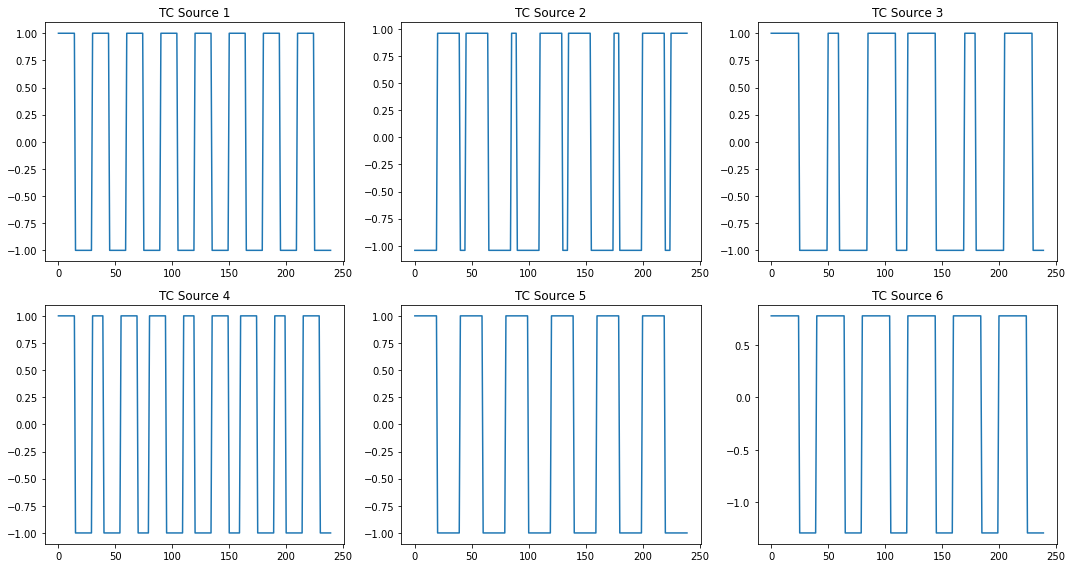

In [5]:
# Standardise data and plot
TC_standardised = standardise_data(TC)

figure(figsize=(15, 8))

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.title("TC Source " + str(i + 1))
    plt.plot(TC_standardised[:, i])

plt.tight_layout()
plt.savefig("../plots/TC_sources.png")
plt.show()

# Question 1.2

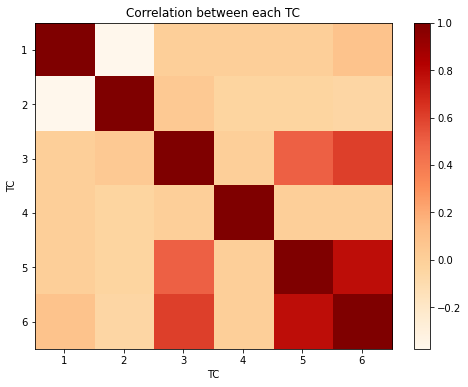

In [6]:
# Correlation matrix of all TCs

TC_correlation = np.corrcoef(TC_standardised.transpose())

figure(figsize=(8, 6))

plt.imshow(TC_correlation, cmap="OrRd", aspect="auto")

plt.title("Correlation between each TC")
plt.colorbar()

plt.xlabel("TC")
plt.ylabel("TC")
plt.xticks(range(6), labels=[1,2,3,4,5,6])
plt.yticks(range(6), labels=[1,2,3,4,5,6])

plt.savefig("../plots/TC_correlation.png")
plt.show()

# Question 1.3

In [7]:
tmpSM = np.zeros((6,21,21))

tmpSM[0][2:6, 2:6] = 1
tmpSM[1][2:6, 15:19] = 1
tmpSM[2][8:13, 2:6] = 1
tmpSM[3][8:13, 15:19] = 1
tmpSM[4][15:19, 2:6] = 1
tmpSM[5][15:19, 15:19] = 1

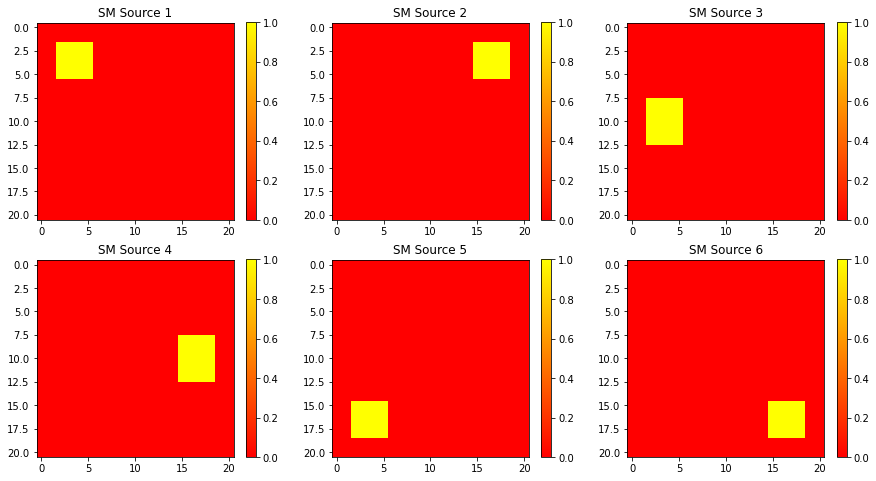

In [8]:
figure(figsize=(15, 8))

for i in range(len(tmpSM)):
    plt.subplot(2, 3, i+1)
    
    plt.imshow(tmpSM[i], interpolation='none', cmap="autumn")
    plt.title("SM Source " + str(i + 1))
    plt.colorbar()

plt.savefig("../plots/SM_sources.png")
plt.show()

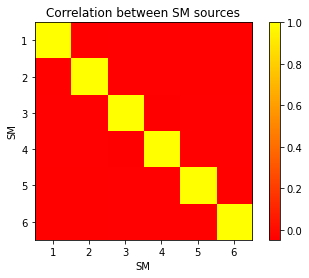

In [9]:
# Reshape tmpSM into size 6 x 441

SM = tmpSM.reshape(tmpSM.shape[0], (tmpSM.shape[1]*tmpSM.shape[2]))

plt.imshow(np.corrcoef(SM), cmap="autumn")
plt.title("Correlation between SM sources")
plt.colorbar()

plt.xlabel("SM")
plt.ylabel("SM")
plt.xticks(range(6), labels=[1,2,3,4,5,6])
plt.yticks(range(6), labels=[1,2,3,4,5,6])

plt.savefig("../plots/SM_correlation.png")
plt.show()

# Question 1.4

In [10]:
def generate_noise():
    temporal = np.random.normal(0, np.sqrt(0.25), size=240*6)
    spatial = np.random.normal(0, np.sqrt(0.015), size=6*441)
    
    return temporal, spatial

In [11]:
temporal, spatial = generate_noise()

gamma_t = temporal.reshape(240, 6)
gamma_s = spatial.reshape(6, 441)

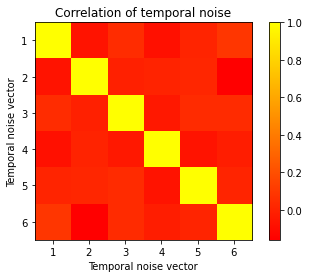

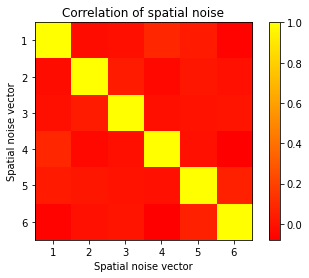

In [12]:
# Temporal CM

plt.imshow(np.corrcoef(np.transpose(gamma_t)), cmap="autumn")
plt.title("Correlation of temporal noise")
plt.colorbar()

plt.xticks(range(6), labels=[1,2,3,4,5,6])
plt.yticks(range(6), labels=[1,2,3,4,5,6])
plt.xlabel("Temporal noise vector")
plt.ylabel("Temporal noise vector")

plt.savefig("../plots/temporal_correlation.png")
plt.show()

# Spatial CM
plt.imshow(np.corrcoef(gamma_s), cmap="autumn")
plt.title("Correlation of spatial noise")
plt.colorbar()

plt.xticks(range(6), labels=[1,2,3,4,5,6])
plt.yticks(range(6), labels=[1,2,3,4,5,6])
plt.xlabel("Spatial noise vector")
plt.ylabel("Spatial noise vector")

plt.savefig("../plots/spatial_correlation.png")
plt.show()

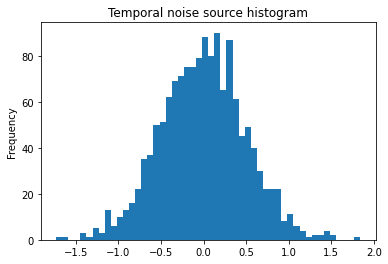

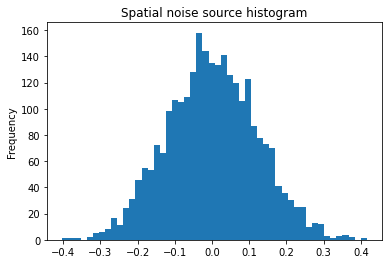

In [13]:
# Temporal noise source histogram
plt.hist(temporal, bins=50)
plt.ylabel("Frequency")
plt.title("Temporal noise source histogram")
plt.savefig("../plots/temporal_hist.png")
plt.show()

# Spatial noise source histogram
plt.hist(spatial, bins=50)
plt.ylabel("Frequency")
plt.title("Spatial noise source histogram")
plt.savefig("../plots/spatial_hist.png")
plt.show()

In [14]:
# Temporal noise statistics
temp_mean = np.mean(temporal)
temp_std = np.std(temporal)
sigma_temp_var = 1.96*temp_std 

print("Temporal mean: ", temp_mean)
print("Temporal variance: ", sigma_temp_var)

Temporal mean:  -0.00610565558816514
Temporal variance:  0.9679677081148773


In [15]:
# Spatial noise statistics
spatial_mean = np.mean(spatial)
spatial_std = np.std(spatial)
sigma_spatial_var = 1.96*spatial_std 

print("Temporal mean: ", spatial_mean)
print("Temporal variance: ", sigma_spatial_var)

Temporal mean:  0.0012906492726752693
Temporal variance:  0.2363275675800068


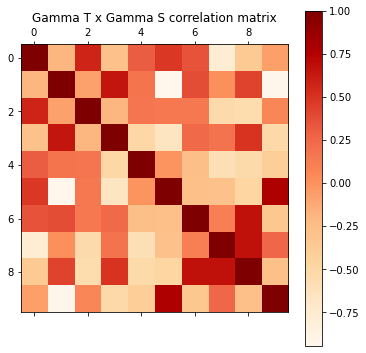

In [16]:
# Gamma T x Gamma S

gamma_ts = np.matmul(gamma_t, gamma_s)

plt.rcParams['figure.figsize'] = [6, 6]
plt.matshow(np.corrcoef(gamma_ts.transpose()[:10,:10]), cmap="OrRd")
plt.title("Gamma T x Gamma S correlation matrix")
plt.colorbar()
plt.savefig("../plots/gamma_ts.png")
plt.show()

# Question 1.5

In [17]:
def generate_synthetic_dataset(TC, SM, t_noise, s_noise):
    gamma_t = t_noise.reshape(240, 6)
    gamma_s = s_noise.reshape(6, 441)
    
    t_incl_noise = TC + gamma_t
    s_incl_noise = SM + gamma_s
    
    synthetic_dataset = np.matmul(t_incl_noise, s_incl_noise)
    
    return synthetic_dataset

In [89]:
# Generate synthetic dataset

X = generate_synthetic_dataset(TC_standardised, SM, temporal, spatial)

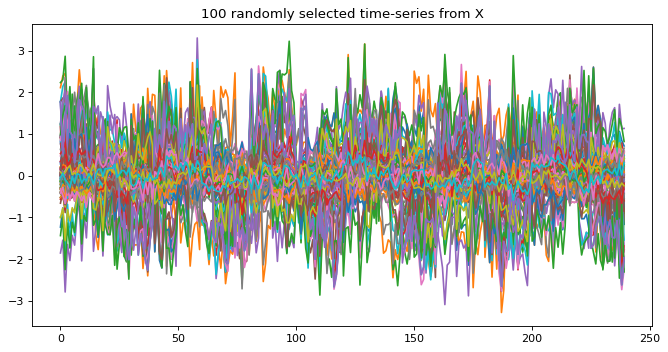

In [19]:
selection = np.random.choice(X.shape[1], size=100)

figure(figsize=(10, 5), dpi=80)

for i in selection:
    plt.plot(X[:, i])

plt.title("100 randomly selected time-series from X")
plt.savefig("../plots/random_x.png")
plt.show()

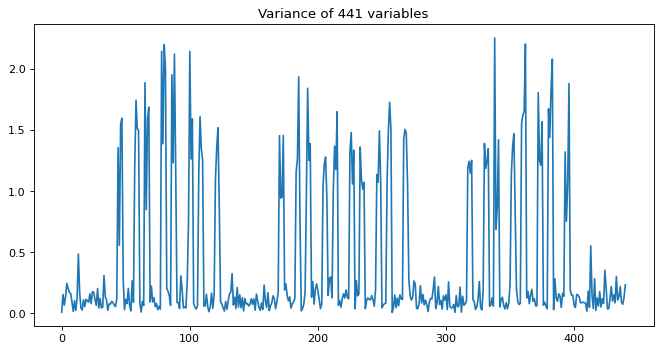

In [20]:
X_var = list()

figure(figsize=(10, 5), dpi=80)

for i in range(X.shape[1]):
    X_var.append(np.var(X[:,i]))

plt.plot(X_var)
plt.title("Variance of 441 variables")
plt.savefig("../plots/x_var.png")
plt.show()

In [21]:
# Standardise X

X_standardised = standardise_data(X)

# Question 2.1

In [90]:
D = TC_standardised
DTD = np.matmul(D.transpose(), D)
DTX = np.matmul(D.transpose(), X_standardised)

A_lsr = np.matmul(np.linalg.inv(DTD), DTX)
D_lsr = np.matmul(X_standardised, A_lsr.transpose())

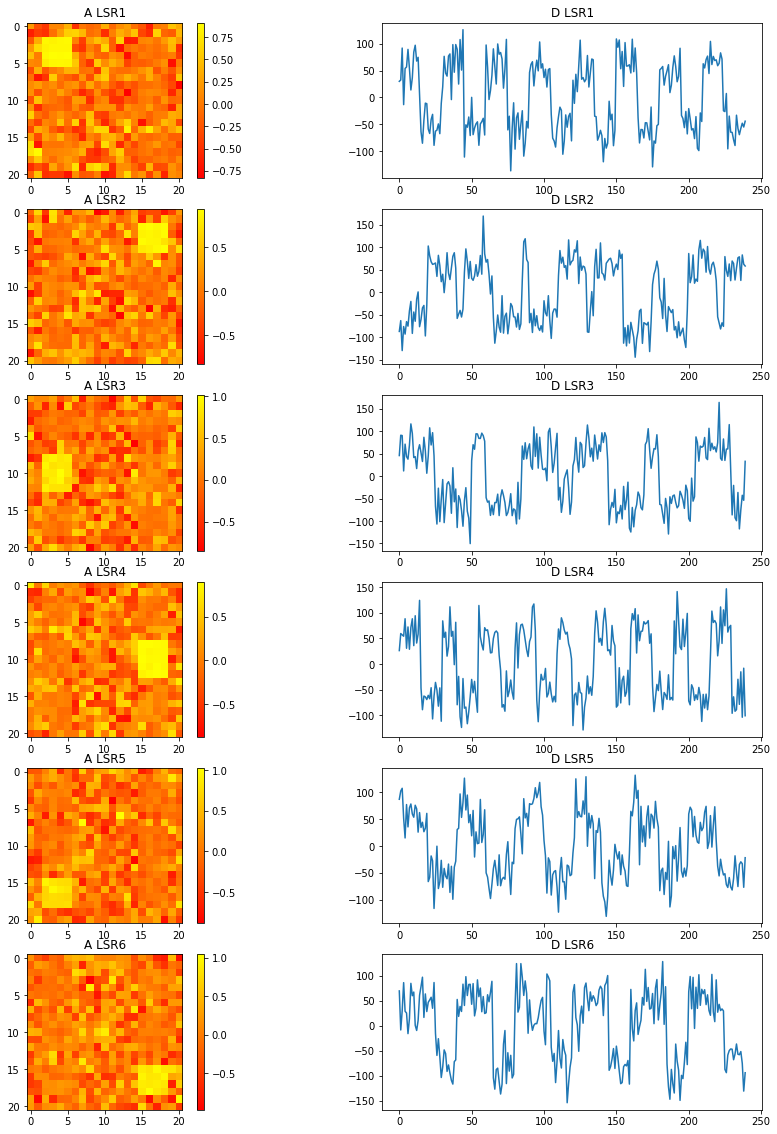

In [81]:
# Retrieved sources plot

figure, axes = plt.subplots(6,2, figsize=(15,20))

for p in range(6):
    spatial_map = np.reshape(A_lsr[p], (21,21))
    im = axes[p, 0].imshow(spatial_map, interpolation='none', cmap="autumn")
    axes[p, 0].set_title("A LSR" + str(p+1))
    
    # Create color bar on the right
    divider = make_axes_locatable(axes[p, 0])
    cax = divider.append_axes('right', size='5%', pad=0.2)
    fig.colorbar(im, cax=cax, orientation="vertical") 
    
    axes[p, 1].plot(D_lsr[:,p])
    axes[p, 1].set_title("D LSR" + str(p+1))

plt.savefig("../plots/A LSR vs D LSR.png")
plt.show()

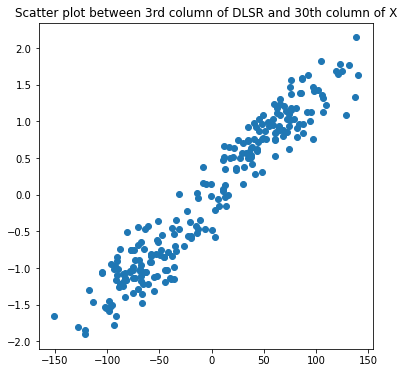

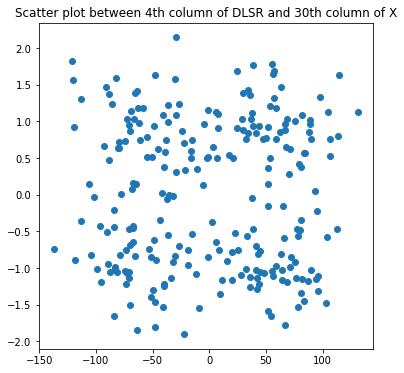

In [93]:
# 3rd column of D_lsr and 30th column of standardised X
plt.scatter(D_lsr[:,2], X_standardised[:,9*21+2])
plt.title("Scatter plot between 3rd column of DLSR and 30th column of X")
plt.savefig("../plots/3rd_30th.png")
plt.show()

# # 4th column of D_lsr and 30th column of standardised X
plt.scatter(D_lsr[:,3], X_standardised[:,9*21+2])
plt.title("Scatter plot between 4th column of DLSR and 30th column of X")
plt.savefig("../plots/4th_30th.png")
plt.show()

# Question 2.2

In [25]:
lambda_param = 0.5
lambda_V = lambda_param*V
identity = np.identity(DTD.shape[0])

ARR = np.matmul(np.linalg.inv(DTD + lambda_V*identity), DTX)
DRR = np.matmul(X_standardised, ARR.transpose())

In [97]:
c_TLSR = np.zeros(6)
c_TRR = np.zeros(6)

for i in range(6):
    c_TLSR[i] = np.corrcoef(TC_standardised[:,i], D_lsr[:, i])[0][1]
    c_TRR[i] = np.corrcoef(TC_standardised[:,i], DRR[:, i])[0][1]
    
print("Sum of c_TRR:", sum(c_TRR))
print("Sum of c_TLSR:", sum(c_TLSR))

Sum of c_TRR: 5.419589683052887
Sum of c_TLSR: 5.2253799065978805


In [98]:
lambda_thousand = 1000
lambda_thousand_V = lambda_thousand*441

ARR_thousand = np.matmul(np.linalg.inv(DTD + lambda_thousand_V*identity), DTX)

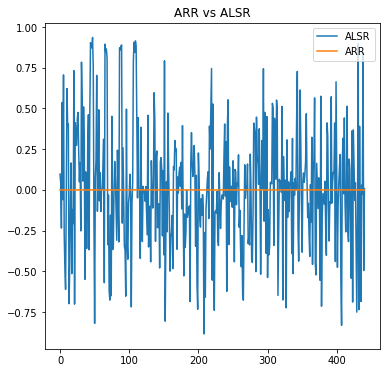

In [99]:
plt.plot(A_lsr[0, :])
plt.plot(ARR_thousand[0, :])
plt.legend(["ALSR", "ARR"], loc="upper right")
plt.title("ARR vs ALSR")
plt.savefig("../plots/lambda_compare.png")
plt.show()

# Question 2.3

In [100]:
def LR(TC_array, rho, X_standardised):

    step = 1/(np.linalg.norm(np.matmul(TC_array, TC_array.transpose())) * 1.1)
    thr = rho*N*step

    Ao = np.zeros((nsrcs, 1))
    A = np.zeros((nsrcs, 1))
    Alr = np.zeros((nsrcs, x1*x2))

    for k in range(x1*x2):
        A = Ao + step * (np.matmul(TC_array.transpose(), (X_standardised[:,k].reshape(240,1)) - (np.matmul(TC_array, Ao)) ))
        A = (1/(1+thr)) * (np.sign(A) * np.maximum(np.zeros(nsrcs), np.transpose(abs(A)-thr)).transpose())
        for i in range(10):
            Ao = A
            A = Ao + step * (np.matmul(TC_array.transpose(), (X_standardised[:,k].reshape(240,1)) - (np.matmul(TC_array, Ao)) ))
            A = (1/(1+thr)) * (np.sign(A) * np.maximum(np.zeros(nsrcs), np.transpose(abs(A)-thr)).transpose())
        Alr[:,k] = A.transpose()
    
    Dlr = np.matmul(X_standardised, Alr.transpose())
    
    return Alr, Dlr

In [101]:
def MSE(Alr, Dlr):
    mse = 0
    for n in range(441):
        mse += ((abs(X_standardised - np.matmul(Dlr, Alr**2)))**2)/(N*V)
    return mse

In [102]:
%%time

rho = np.arange(0,1.05,0.05)

mse_array = np.zeros((10,21))

for i in range(10):
    temporal, spatial = generate_noise()
    X = generate_synthetic_dataset(TC_standardised, SM, temporal, spatial)
    X_standardised = standardise_data(X) 
#     print(X_standardised.shape, Dlr.shape, Alr.shape)
    for j in range(len(rho)):
        total_mse = 0
        Alr, Dlr = LR(TC_standardised, rho[j], X_standardised)
#         print(Dlr.shape, Alr.shape)
        total_mse += MSE(Alr, Dlr)
        mse_array[i][j] = np.mean(total_mse)

CPU times: user 3min 34s, sys: 6min 5s, total: 9min 39s
Wall time: 51.7 s


In [103]:
# Compute mean MSE for each value of rho against 10 realisations

lowest = 10
lowest_rho = 0

for i in range(mse_array.shape[1]):
    current_rho_mean = np.mean(mse_array[:,i])
    print(current_rho_mean)
    if current_rho_mean < lowest:
        lowest = current_rho_mean
        lowest_rho = rho[i]

print()
print("Minimum MSE:", lowest, "rho:", lowest_rho)

4.355178188859247
1.8266754458631982
0.801545943139006
0.35257597163462095
0.1522400447376071
0.06374829637962386
0.026032984290371264
0.010897931311814189
0.005417483403581488
0.0038106251423437134
0.003581512212524468
0.00373559242639381
0.003923623737997909
0.004053761523652265
0.004123901568288837
0.0041544960448791895
0.004164621858754459
0.004166576267762334
0.004166666642859175
0.004166666666666667
0.004166666666666667

Minimum MSE: 0.003581512212524468 rho: 0.5


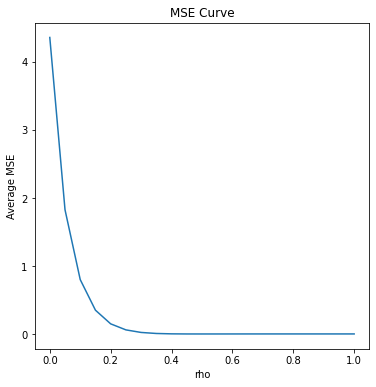

In [104]:
mean_mse = list()

for i in range(mse_array.shape[1]):
    mean_mse.append(np.mean(mse_array[:, i]))

plt.plot(rho, mean_mse)
plt.title("MSE Curve")
plt.xlabel("rho")
plt.ylabel("Average MSE")
plt.savefig("../plots/MSE Curve")
plt.show()

# Question 2.4

In [116]:
# Ensure that all parameters are under the same dataset
temporal, spatial = generate_noise()
X = generate_synthetic_dataset(TC_standardised, SM, temporal, spatial)
X_standardised = standardise_data(X)

D = TC_standardised
DTD = np.matmul(D.transpose(), D)
DTX = np.matmul(D.transpose(), X_standardised)

ARR = np.matmul(np.linalg.inv(DTD + lambda_V*identity), DTX)
DRR = np.matmul(X_standardised, ARR.transpose())

# LR parameters for optimal rho
ALR, DLR = LR(TC_standardised, lowest_rho, X_standardised)

# Correlation vectors
c_TRR = np.zeros(6)
c_SRR = np.zeros(6)
c_TLR = np.zeros(6)
c_SLR = np.zeros(6)

for i in range(6):
    c_TRR[i] = np.corrcoef(TC_standardised[:,i], DRR[:, i])[0][1]
    c_SRR[i] = np.corrcoef(SM[i,:], ARR[i, :])[0][1]
    c_TLR[i] = np.corrcoef(TC_standardised[:,i], DLR[:, i])[0][1]
    c_SLR[i] = np.corrcoef(SM[i,:], ALR[i, :])[0][1]

In [117]:
print("Sum of c_TLR:", sum(c_TLR), "vs Sum of c_TRR:", sum(c_TRR))
print("Sum of c_SLR:", sum(c_SLR), "vs Sum of c_SRR:", sum(c_SRR))

Sum of c_TLR: 5.3914928893697756 vs Sum of c_TRR: 5.371293042731145
Sum of c_SLR: 4.248504971139197 vs Sum of c_SRR: 2.5415818649201647


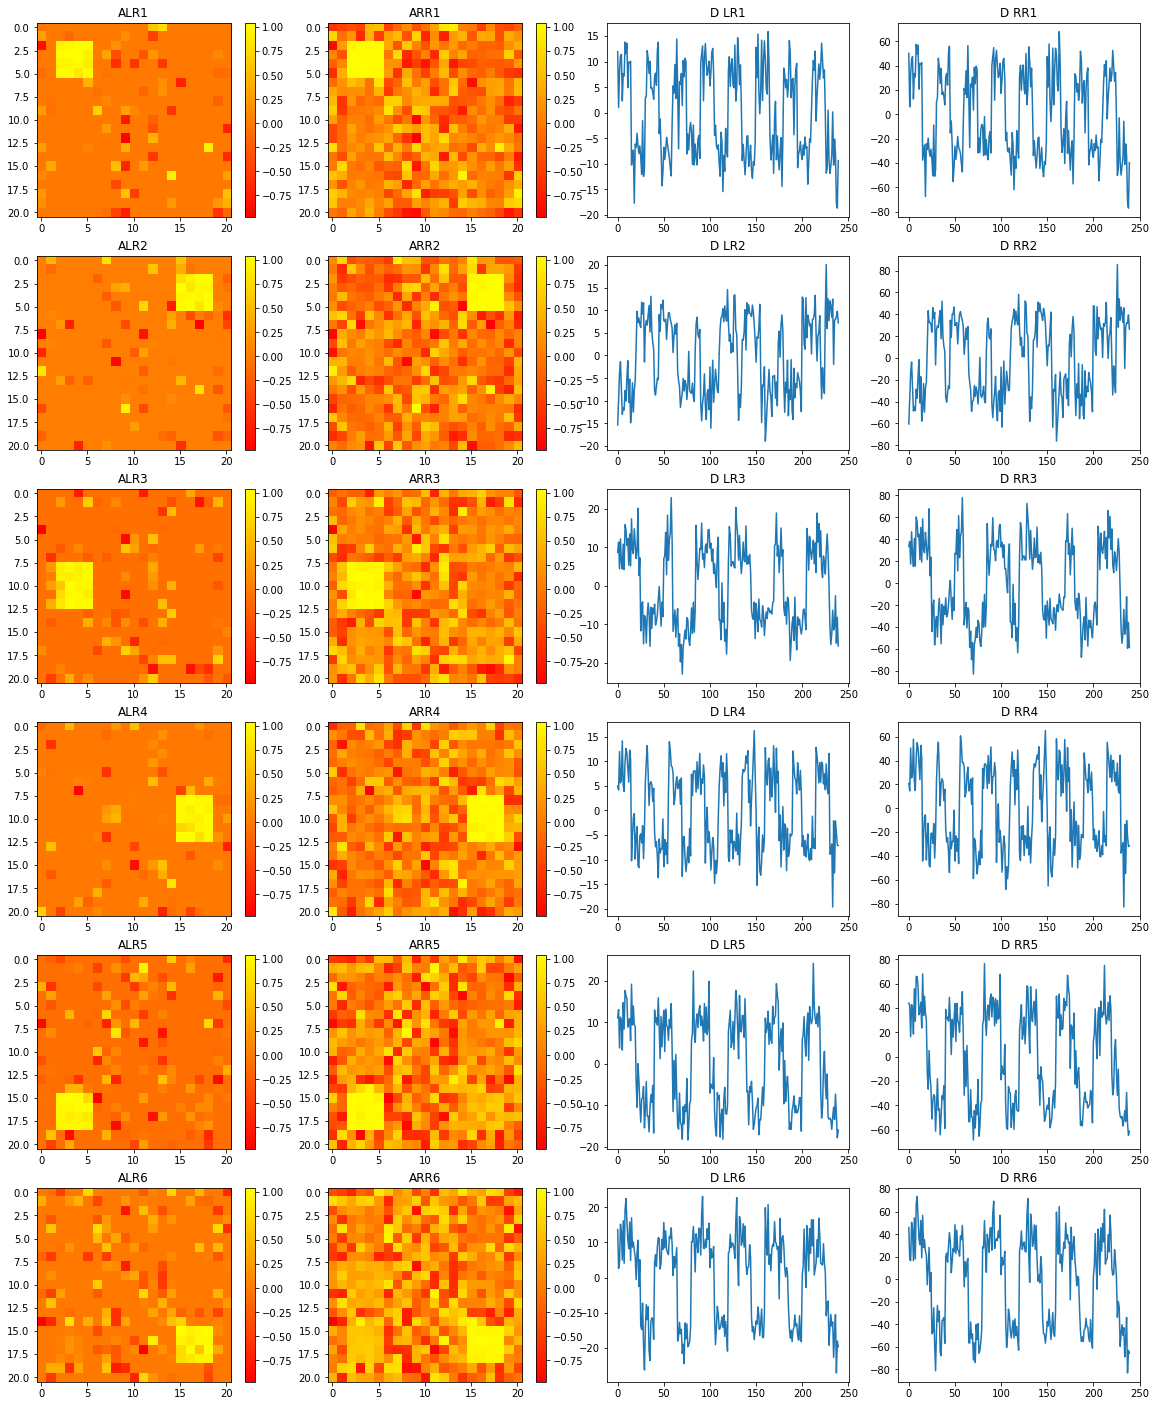

In [131]:
figure, axes = plt.subplots(6,4, figsize=(20,25))

for p in range(6):
    # ALR
    spatial_map_LR = np.reshape(ALR[p], (21,21))
    im1 = axes[p, 0].imshow(spatial_map_LR, interpolation='none', cmap="autumn")
    axes[p, 0].set_title("ALR" + str(p+1))
    
    divider = make_axes_locatable(axes[p, 0])
    cax = divider.append_axes('right', size='5%', pad=0.2)
    fig.colorbar(im, cax=cax, orientation="vertical")

    # ARR
    spatial_map_RR = np.reshape(ARR[p], (21,21))
    im2 = axes[p, 1].imshow(spatial_map_RR, interpolation='none', cmap="autumn")
    axes[p, 1].set_title("ARR" + str(p+1))
    
    divider = make_axes_locatable(axes[p, 1])
    cax = divider.append_axes('right', size='5%', pad=0.2)
    fig.colorbar(im, cax=cax, orientation="vertical")    

#     # DLR
    axes[p, 2].plot(DLR[:, p])
    axes[p, 2].set_title("D LR" + str(p+1))
    
#     # DRR
    axes[p, 3].plot(DRR[:, p])
    axes[p, 3].set_title("D RR" + str(p+1))
    
plt.savefig("../plots/ALR_ARR_DLR_DRR.png")
plt.show()

# Question 2.5

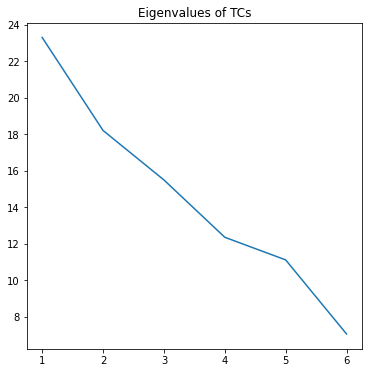

In [149]:
# PCA
U, V, W = np.linalg.svd(TC_standardised)

# Eigenvalues
plt.plot([1,2,3,4,5,6], V)
plt.title("Eigenvalues of TCs")
plt.savefig("../plots/TC_eigenvalues.png")
plt.show()

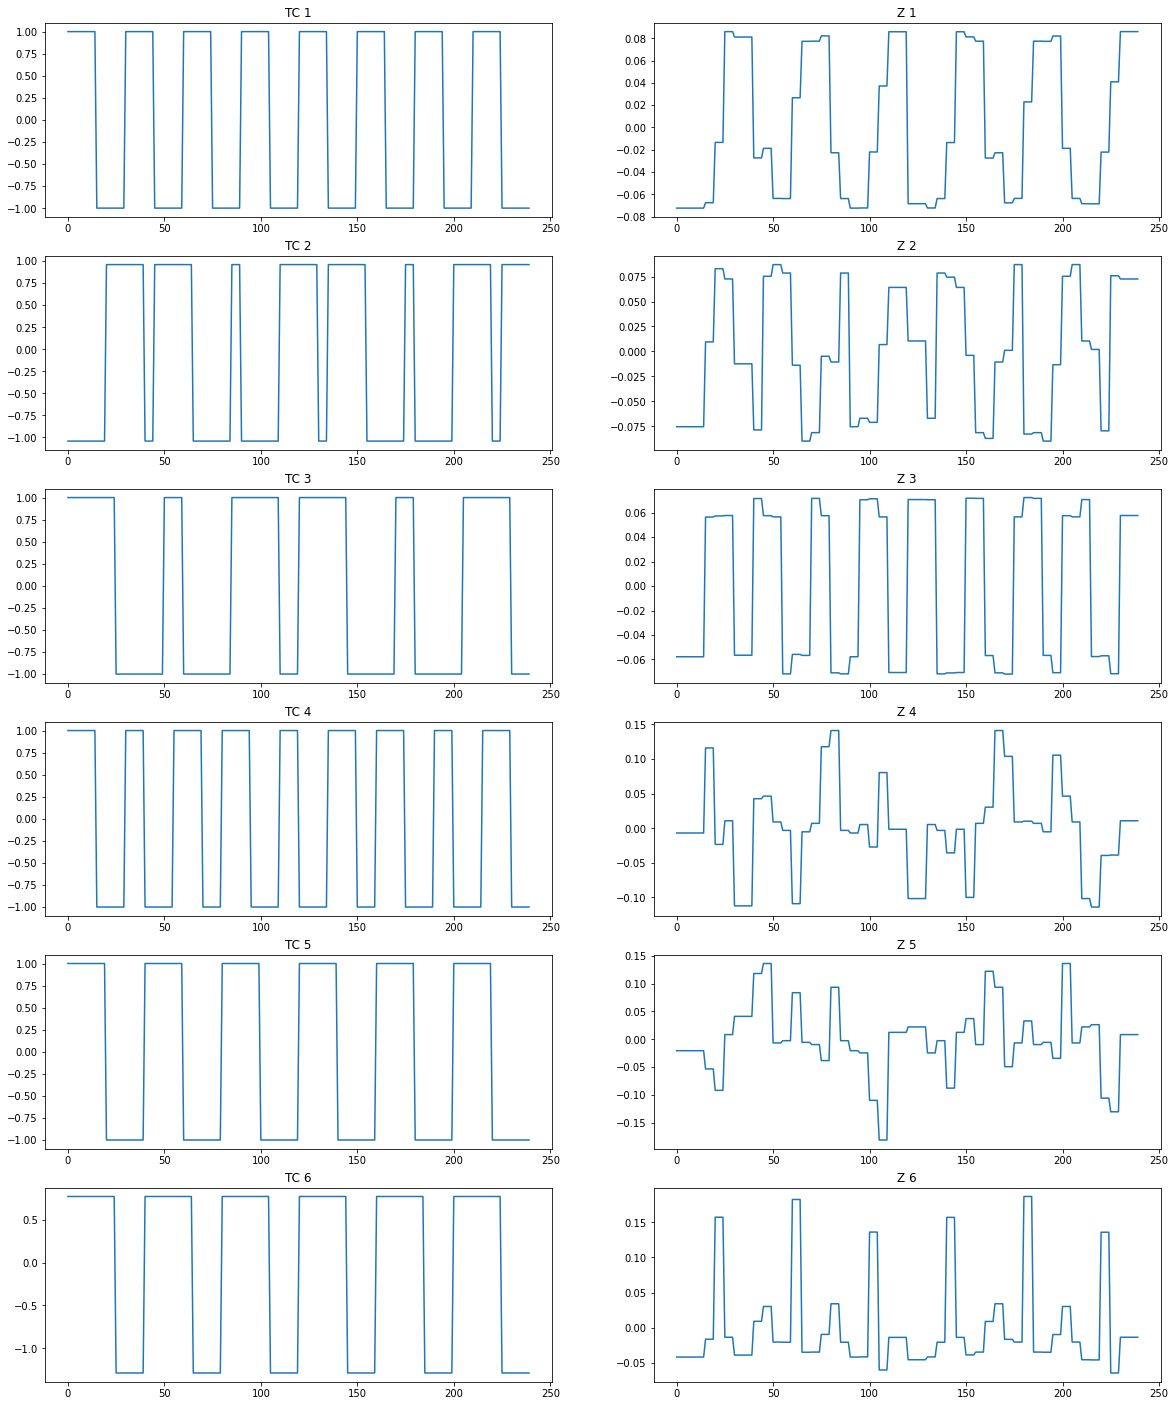

In [150]:
# Z
Z = np.matmul(U, TC_standardised)

figure, axes = plt.subplots(6,2, figsize=(20,25))
for i in range(6):
    # TC      
    axes[i, 0].plot(TC_standardised[:, i])
    axes[i, 0].set_title("TC " + str(i+1))
    
    # Z
    axes[i, 1].plot(U[:, i])
    axes[i, 1].set_title("Z " + str(i+1))

plt.savefig("../plots/TC vs Z.png")
plt.show()

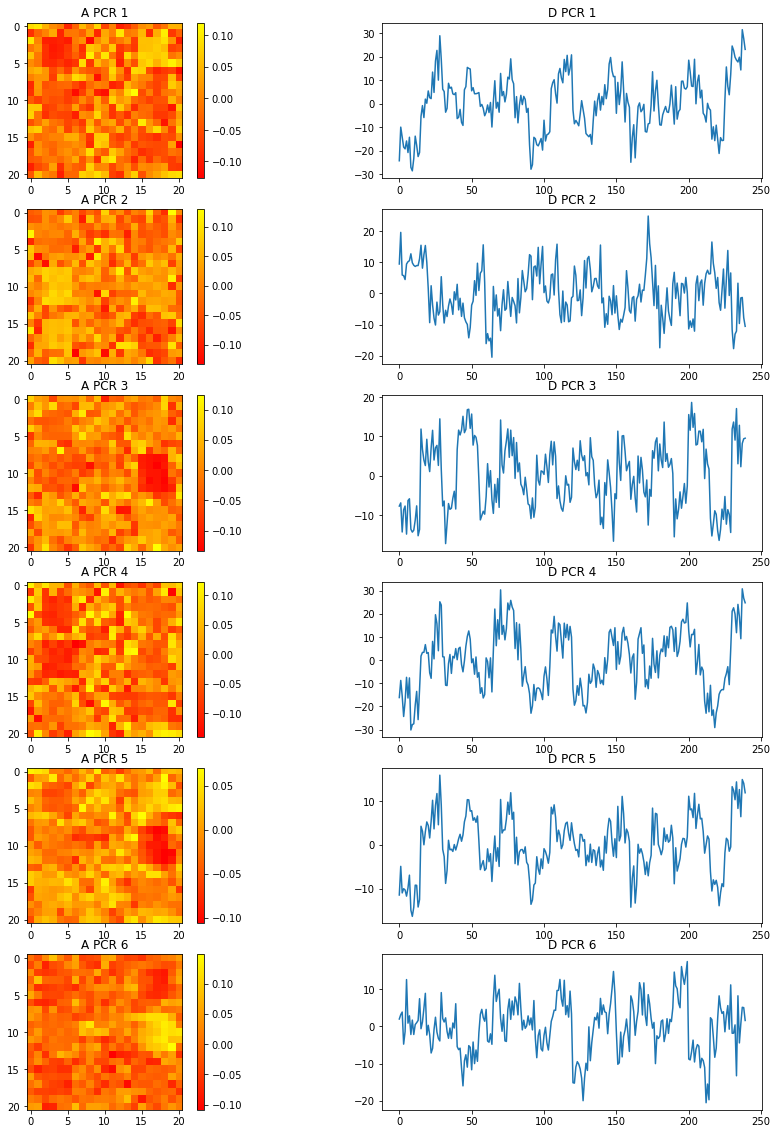

In [153]:
# Lasso using Z

PCA_rho = 0.001

A_PCR, D_PCR = LR(Z, PCA_rho, X_standardised)

figure, axes = plt.subplots(6,2, figsize=(15,20))

for p in range(6):
    spatial_map = np.reshape(A_PCR[p], (21,21))
    im = axes[p, 0].imshow(spatial_map, cmap="autumn")
    axes[p, 0].set_title("A PCR " + str(p+1))
    
    # Create color bar on the right
    divider = make_axes_locatable(axes[p, 0])
    cax = divider.append_axes('right', size='5%', pad=0.2)
    fig.colorbar(im, cax=cax, orientation="vertical") 
    
    axes[p, 1].plot(D_PCR[:,p])
    axes[p, 1].set_title("D PCR " + str(p+1))

plt.savefig("../plots/A PCR vs D PCR.png")
plt.show()